<a href="https://colab.research.google.com/github/ZaKSa/neural-networks-8semester-/blob/marathon/%D0%97%D0%B0%D1%86%D0%B5%D0%BF%D0%B8%D0%BD%D0%B0_6_%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_%D0%BE%D0%B1%D1%80%D0%B0%D1%82%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%BE%D1%81%D1%82%D1%80%D0%B0%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Зацепина Ксения 6407

1. сделано
2. сделано


Средний вес отражающий значения зелёной секции светофора близок к 1
А левый и правый - синий и белый цвета- близки к 0.
В результате сеть выявила корреляцию между средней секцией светофора и возможностью перейти дорогу
Корреляция между входным и выходным наборами данных наблюдаются там где веса имеют высокие значения и наоборот
В процессе обучения выявили, что левая и правая секции светофора не вносят свой вклад в результирующий прогноз сети

Нейронная сеть нашла корреляцию данных. А если нет корреляции? Сгенерируем промежуточные данные, в которых такая корреляция есть - 1 скрытый слой сети

Комбинация двух сетей, наложенных друг на друга
Выход первой сети - вход второй сети


Алгоритм обратного распространения ошибки : backpropagation

Расчет прогноза сети - прямой проход -forward 

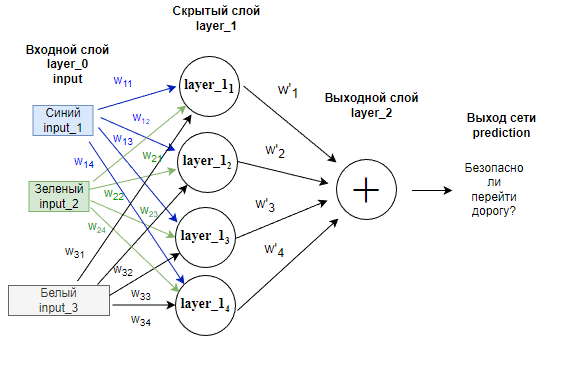

Введем обозначения:


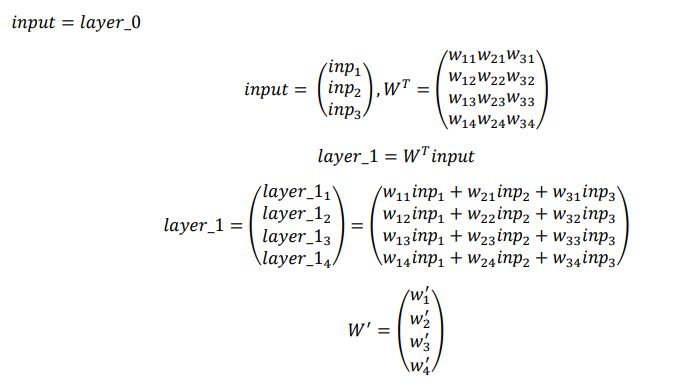

Обратный проход.
1. Коррекция весов W'. Та же процедура, что вы реализовывали ранее:



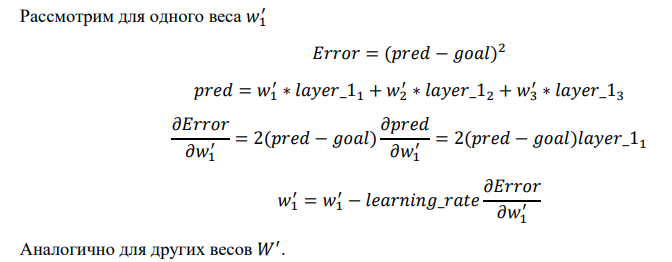

2.	Коррекция весов W:

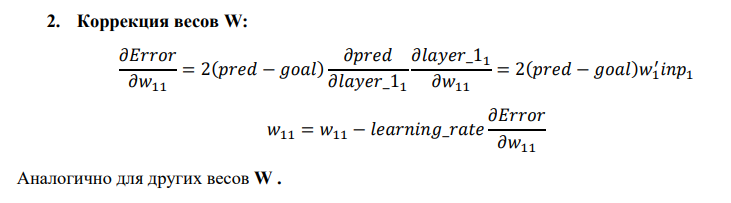

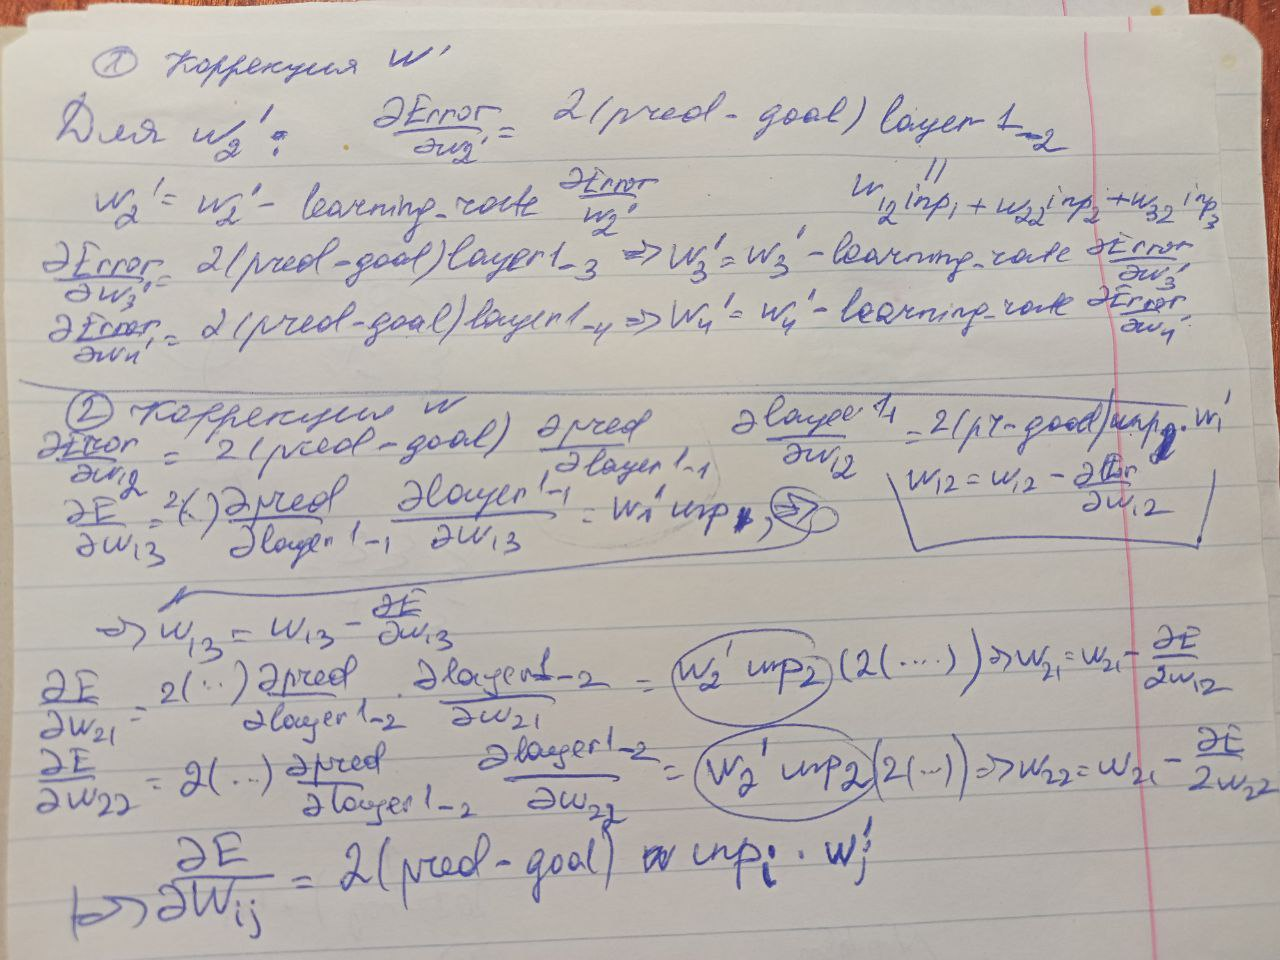

1. Реализуйте 1 итерацию обратного распространения. На выбор для 1 точки, для всех данных или для батча. Желательно в векторном виде.

***ДЛЯ всех данных***

In [ ]:

import numpy as np

np.random.seed(1)

lights = np.array( [[ 1, 0, 1 ],
                    [ 0, 1, 1 ],
                    [ 0, 0, 1 ],
                    [ 1, 1, 1 ] ] )

walk_stop = np.array([[ 1, 1, 0, 0]]).T

learning_rate = 0.2
hidden_size = 4

weights_0_1 = 2*np.random.random((3,hidden_size)) - 1 #веса между входным и скрытым слоями W
weights_1_2 = 2*np.random.random((hidden_size,1)) - 1 #веса между скрытым и выходным слоями W'

#Коррекция W'
input=lights[0]
goal_prediction=walk_stop[0]

layer1=np.dot(input, weights_0_1) #получаем layer1

predictionL1 = np.dot(layer1, weights_1_2)
error = (predictionL1 - goal_prediction) ** 2
print("Error1:" + str(error) + " Prediction1:" + str(predictionL1 ))

weightL1_corrections = 2* (predictionL1 - goal_prediction) * layer1 #
print("Weight corrections1: "+ str(weightL1_corrections))

print("Weight1: \n"+ str(weights_1_2))
weights_1_2_T=weights_1_2.copy().T
weights_1_2 = weights_1_2_T - (learning_rate *  weightL1_corrections)
print("Weight1: \n" + str(weights_1_2.T))

#Коррекция W
weightL0_corrections=[]
weightL0_corrections.append(2*(predictionL1 - goal_prediction)*np.dot(input[0],weights_1_2[0]))
weightL0_corrections.append(2*(predictionL1 - goal_prediction)*np.dot(input[1],weights_1_2[0]))
weightL0_corrections.append(2*(predictionL1 - goal_prediction)*np.dot(input[2],weights_1_2[0]))
weightL0_corrections_=np.array(weightL0_corrections)
print("Weight corrections2: \n"+ str(weightL0_corrections_))

weights_0_1 = weights_0_1 - (learning_rate *  weightL0_corrections_)
print("Weight2: \n" + str(weights_0_1))

Error1:[0.49190458] Prediction1:[1.70135909]
Weight corrections1: [-0.52240177  0.72700423 -1.62909197 -0.03492187]
Weight1: 
[[-0.5910955 ]
 [ 0.75623487]
 [-0.94522481]
 [ 0.34093502]]
Weight1: 
[[-0.48661515]
 [ 0.61083403]
 [-0.61940642]
 [ 0.34791939]]
Weight corrections2: 
[[-0.68258392  0.856828   -0.86885265  0.48803286]
 [ 0.          0.          0.          0.        ]
 [-0.68258392  0.856828   -0.86885265  0.48803286]]
Weight2: 
[[-0.02943921  0.26928339 -0.82600072 -0.49294143]
 [-0.70648822 -0.81532281 -0.62747958 -0.30887855]
 [-0.06994827 -0.09373213  0.01215956  0.27283243]]


Возникла очень большая путаница с матрицами и их транспонированиям. Участок кода после 

```
#Коррекция W
```
вообще страшно выглядит. Но получается надо умножить инпут1 на все полученные веса, потом также инпут 2 и инпут 3.

И почему-то пришлось менять размернсоть массивов с тройки на четверку


In [ ]:
#черновик
import numpy as np

np.random.seed(1)

lights = np.array( [[ 1, 0, 1 ],
                    [ 0, 1, 1 ],
                    [ 0, 0, 1 ],
                    [ 1, 1, 1 ] ] )

walk_stop = np.array([[ 1, 1, 0, 0]]).T

learning_rate = 0.2
hidden_size = 4

weights_0_1 = 2*np.random.random((3,hidden_size)) - 1 #веса между входным и скрытым слоями W
weights_1_2 = 2*np.random.random((hidden_size,1)) - 1 #веса между скрытым и выходным слоями W'

#Коррекция W'
input=lights[0]
goal_prediction=walk_stop[0]

layer1=np.dot(input, weights_0_1) #получаем layer1

predictionL1 = np.dot(layer1, weights_1_2)
error = (predictionL1 - goal_prediction) ** 2
print("Error1:" + str(error) + " Prediction1:" + str(predictionL1 ))

weightL1_corrections = 2* (predictionL1 - goal_prediction) * layer1 #
print("Weight corrections1: "+ str(weightL1_corrections))

print("Weight1: \n"+ str(weights_1_2))
weights_1_2_T=weights_1_2.copy().T
weights_1_2 = weights_1_2_T - (learning_rate *  weightL1_corrections)
print("Weight1: \n" + str(weights_1_2.T))

#Коррекция W
weightL0_corrections=[]
weightL0_corrections.append(2*(predictionL1 - goal_prediction)*np.dot(input[0],weights_1_2[0]))
weightL0_corrections.append(2*(predictionL1 - goal_prediction)*np.dot(input[1],weights_1_2[0]))
weightL0_corrections.append(2*(predictionL1 - goal_prediction)*np.dot(input[2],weights_1_2[0]))
weightL0_corrections_=np.array(weightL0_corrections)
print("Weight corrections2: \n"+ str(weightL0_corrections_))

weights_0_1 = weights_0_1 - (learning_rate *  weightL0_corrections_)
print("Weight2: \n" + str(weights_0_1))

Error1:[0.49190458] Prediction1:[1.70135909]
Weight corrections1: [-0.52240177  0.72700423 -1.62909197 -0.03492187]
Weight1: [[-0.5910955 ]
 [ 0.75623487]
 [-0.94522481]
 [ 0.34093502]]
Weight1: [[-0.48661515  0.61083403 -0.61940642  0.34791939]]
Weight corrections2: [[-0.68258392  0.856828   -0.86885265  0.48803286]
 [ 0.          0.          0.          0.        ]
 [-0.68258392  0.856828   -0.86885265  0.48803286]]
Weight2: [[-0.02943921  0.26928339 -0.82600072 -0.49294143]
 [-0.70648822 -0.81532281 -0.62747958 -0.30887855]
 [-0.06994827 -0.09373213  0.01215956  0.27283243]]
Error2:[0.49190458] Prediction2:[1.70135909]


***Вот так находим заключительные веса***

inp1 х w1'

inp1 х w2'

inp1 х w3'

inp1 х w4'

---
inp2 х w1'

inp2 х w2'

inp2 х w3'

inp2 х w4'

---
inp3 х w1'

inp3 х w2'

inp3 х w3'

inp3 х w4'